In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
from IPython.display import HTML
from IPython.display import display
import math

In [28]:
# Physical constants
g = 9.8  # gravitational pull 9.8 m/s
L = 2    # Pendulum length
mu = .3  # resistance, for more natural result should be .1

# Initial values of theta and theta_dot
THETA_0 = 90 * np.pi/180   # 90 degrees -> dgr * pi/180
THETA_DOT_0 = 5            # no initial velocity

In [29]:
# ODE def
def get_theta_double_dot(theta, theta_dot):
    return -mu * theta_dot - (g/L) * np.sin(theta)

# solution to the differential equation
def theta(t, THETA_0 = 90*np.pi/180, THETA_DOT_0 = 5):
    theta = THETA_0
    theta_dot = THETA_DOT_0
    delta_t = .01
    for time in np.arange(0, t, delta_t):
        theta_double_dot = get_theta_double_dot(
            theta, theta_dot
        )
        theta += theta_dot * delta_t
        theta_dot += theta_double_dot * delta_t
    return theta, theta_dot

In [30]:
# Printing theta in time steps
# Solving ODE numerically
start_t = 0
end_t = 30
step_t = .1
t_vec = np.arange(start_t, end_t, step_t)
angles = []
angular_v = []
for t in t_vec:
    pendulum_ode = theta(t)
    angles.append(pendulum_ode[0])
    angular_v.append(pendulum_ode[1])

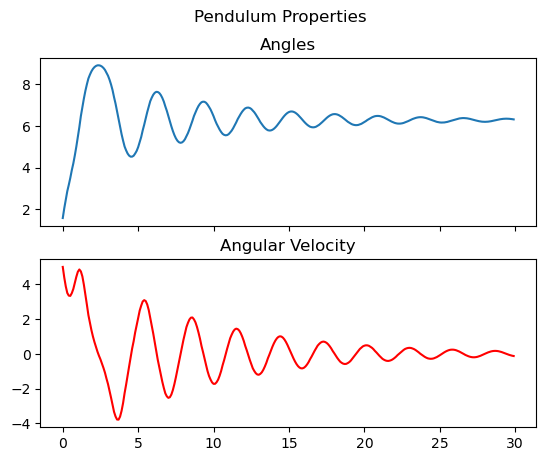

In [31]:
# Graph of Angles and Angular velocity
fig, axs = plt.subplots(2, sharex=True)
fig.suptitle('Pendulum Properties')
axs[0].plot(t_vec, angles)
axs[0].set_title('Angles')
axs[1].plot(t_vec, angular_v, color='red')
axs[1].set_title('Angular Velocity')
plt.show()

In [32]:
# Animation of a pendulum swinging
x = L * np.sin(angles)
y = -L * np.cos(angles)
t = t_vec

x0,y0 = x[0], y[0]

fig = plt.figure()
ax = fig.add_subplot(aspect='equal')

line, = ax.plot([0, x0], [0, y0], lw=3, c='green')
bob_radius = 0.08
circle = ax.add_patch(plt.Circle((x0,y0), bob_radius,
                      fc='r', zorder=3))

ax.set_xlim([-x.max()-.3, x.max()+.3])
ax.set_ylim([y.min()-.3,y.max()+.3])

def animate(i):
    """Update the animation at frame i."""
    line.set_data([0, x[i]], [0, y[i]])
    circle.set_center((x[i], y[i]))

nsteps = len(x)
nframes = nsteps
dt = t[1]-t[0]
interval = dt * 1000
ani = animation.FuncAnimation(fig, animate, frames=nframes, repeat=True,
                              interval=interval)
display(HTML(ani.to_html5_video()))
plt.clf()

<Figure size 640x480 with 0 Axes>

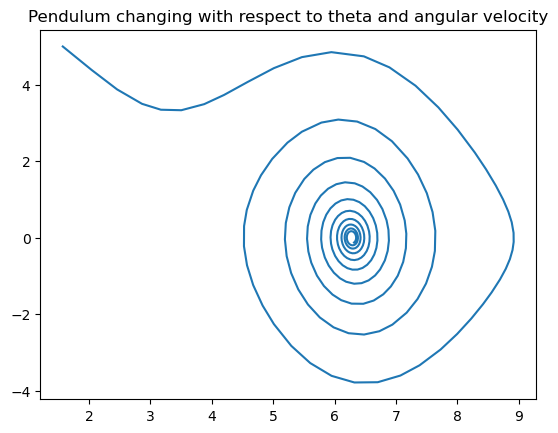

In [72]:
# Here I can create vector field representing the Pendulum ODE, axis are ready for the vector field
# x_axis = angle therefore theta
# y_axis = angular velocity, theta_dot
x_axis = angles
y_axis = angular_v

# acceleration is a function of those two f(x, y) = acceleration
# the vector comming from point (x, y) is (theta_dot, theta_double_dot) vector
plt.plot(x_axis, y_axis)
plt.title('Pendulum changing with respect to theta and angular velocity')
plt.show()

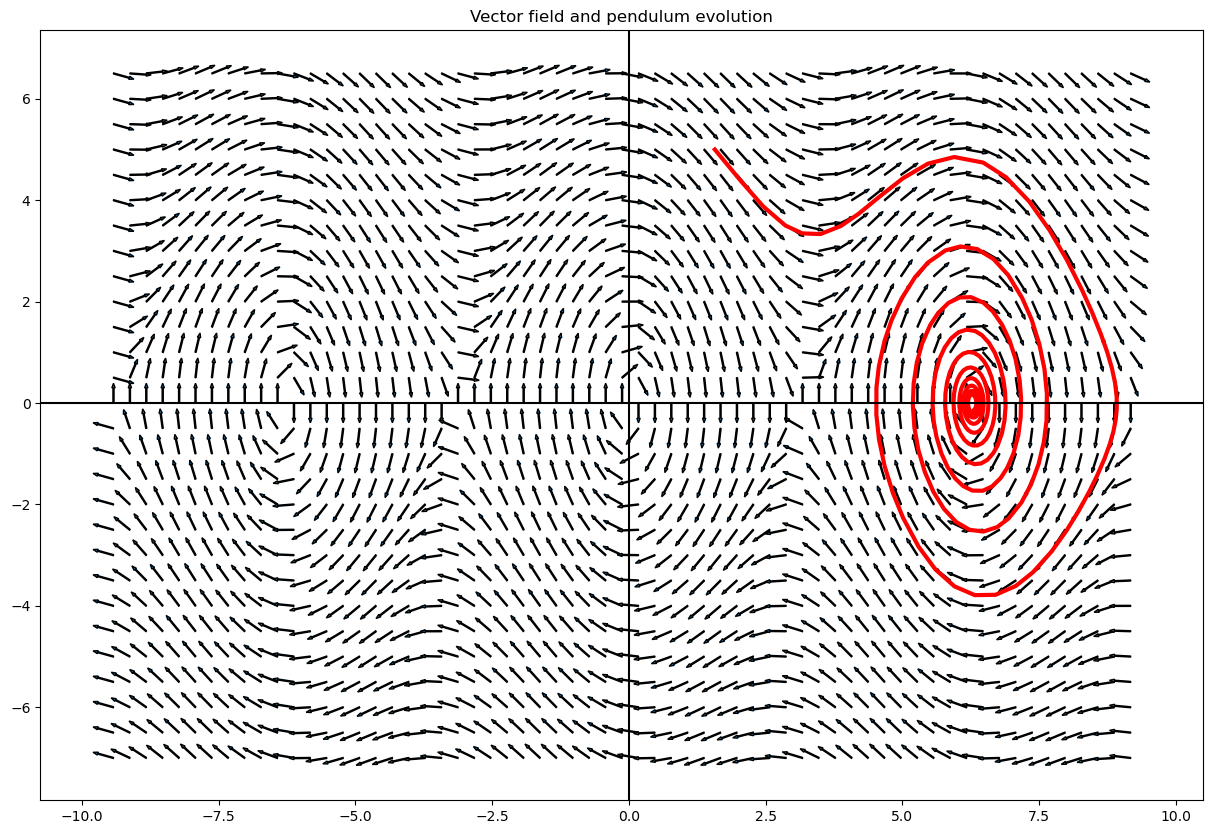

In [71]:
x_axis = np.arange(-3*np.pi, 3*np.pi, .3)
y_axis = np.arange(-7, 7, .5)
vector = []

fig, ax = plt.subplots(facecolor='white', figsize=(15, 10))
ax.plot()

for angle in x_axis:
    for velocity in y_axis:
        theta_dot = theta(0, angle, velocity)[1] 
        theta_double_dot = get_theta_double_dot(angle, theta_dot) 
        
        length = .3
        u = (length / math.sqrt(theta_dot**2 + theta_double_dot**2)) * np.array([theta_dot, theta_double_dot])
        
        ax.arrow(angle, velocity, u[0], u[1], width = 0.02)
        
ax.set_title('Vector field and pendulum evolution')
ax.plot(angles, angular_v, color='red', linewidth=3) 
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.show()